In [ ]:
pip install opencv-contrib-python

Please upload the OBJECT image (e.g., object.jpg)


Saving 9830f48aaf9779c18f35b66caa107eea.jpg to 9830f48aaf9779c18f35b66caa107eea (4).jpg
Please upload the SCENE image (e.g., scene.jpg)


Saving 491802098_1321708062666594_8287332425000190740_n.jpg to 491802098_1321708062666594_8287332425000190740_n.jpg


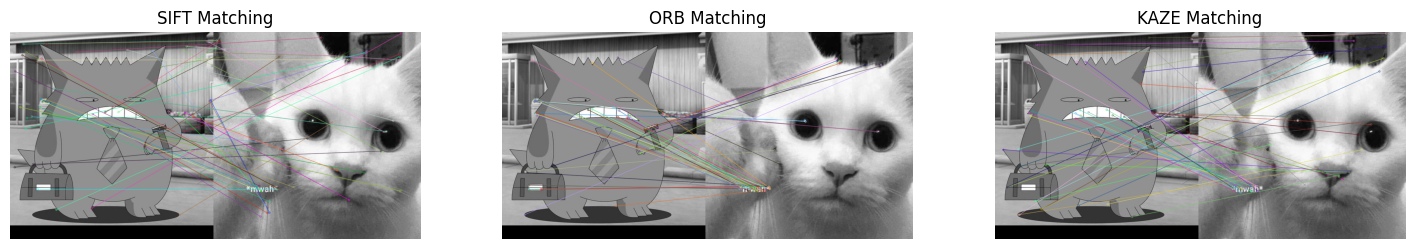

SIFT keypoints: 393 (Object), 446 (Scene)
ORB keypoints: 500 (Object), 500 (Scene)
KAZE keypoints: 960 (Object), 338 (Scene)


In [ ]:
# =====================================
# Lab Activity 4: Feature Detection
# Using SIFT, ORB, and KAZE (Colab-ready)
# =====================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Upload Images ---
print("Please upload the OBJECT image (e.g., object.jpg)")
uploaded1 = files.upload()

print("Please upload the SCENE image (e.g., scene.jpg)")
uploaded2 = files.upload()

# Get uploaded file names
img1_name = list(uploaded1.keys())[0]
img2_name = list(uploaded2.keys())[0]

# Load images in grayscale
img1 = cv2.imread(img1_name, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_name, cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise IOError("Error loading images. Please upload valid image files.")

# --- Step 2: Define Matcher Function ---
def match_and_draw(img1, kp1, des1, img2, kp2, des2, method="BF"):
    if des1 is None or des2 is None or len(kp1) == 0 or len(kp2) == 0:
        return np.zeros((100, 100, 3), dtype=np.uint8)  # blank if no features

    # Select norm type automatically
    norm_type = cv2.NORM_L2 if des1.dtype != np.uint8 else cv2.NORM_HAMMING
    bf = cv2.BFMatcher(norm_type, crossCheck=True)

    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top 50 matches
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
    return matched_img

# --- Step 3: Feature Detectors ---

# SIFT
sift = cv2.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)
sift_result = match_and_draw(img1, kp1_sift, des1_sift, img2, kp2_sift, des2_sift)

# ORB
orb = cv2.ORB_create()
kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)
orb_result = match_and_draw(img1, kp1_orb, des1_orb, img2, kp2_orb, des2_orb)

# KAZE
kaze = cv2.KAZE_create()
kp1_kaze, des1_kaze = kaze.detectAndCompute(img1, None)
kp2_kaze, des2_kaze = kaze.detectAndCompute(img2, None)
kaze_result = match_and_draw(img1, kp1_kaze, des1_kaze, img2, kp2_kaze, des2_kaze)

# --- Step 4: Show Results ---
results = [("SIFT", sift_result), ("ORB", orb_result), ("KAZE", kaze_result)]

plt.figure(figsize=(18, 6))
for i, (name, res) in enumerate(results):
    plt.subplot(1, len(results), i+1)
    plt.imshow(res)
    plt.title(f"{name} Matching")
    plt.axis("off")
plt.show()

# --- Step 5: Print Keypoint Counts ---
print(f"SIFT keypoints: {len(kp1_sift)} (Object), {len(kp2_sift)} (Scene)")
print(f"ORB keypoints: {len(kp1_orb)} (Object), {len(kp2_orb)} (Scene)")
print(f"KAZE keypoints: {len(kp1_kaze)} (Object), {len(kp2_kaze)} (Scene)")
